<a href="https://colab.research.google.com/github/MRBin77/Industry_labs/blob/master/Lab1_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 8

# Фильтрация и сортировка данных

Импортируйте данные `Euro_2012_stats_TEAM.csv` и присвойте переменной $euro12$

In [0]:
euro12 = pd.read_csv("gdrive/My Drive/Labs_Industry/data/Euro_2012_stats_TEAM.csv", sep=",")
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,Passes completed,Passing Accuracy,Touches,Crosses,Dribbles,Corners Taken,Tackles,Clearances,Interceptions,Clearances off line,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,2,1076,828,76.9%,1706,60,42,14,49,83,56,NaN,0,10,3,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,0,1565,1223,78.1%,2358,46,68,21,62,98,37,2.0,1,10,6,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,3,1298,1082,83.3%,1873,43,32,16,40,61,59,0.0,1,10,5,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,3,1488,1200,80.6%,2440,58,60,16,86,106,72,1.0,2,29,3,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,0,2066,1803,87.2%,2909,55,76,28,71,76,58,0.0,1,7,5,6,54.6%,36,51,5,6,0,11,11,19


Выберите только столбец `Goal`

In [0]:
euro12['Goals']

0      4
1      4
2      4
3      5
      ..
12     5
13    12
14     5
15     2
Name: Goals, Length: 16, dtype: int64

Сколько команд участвовало в Евро2012?

In [0]:
euro12['Team'].count()

16

Сколько столбцов в датасете?

In [0]:
euro12.shape[1]

35

Выберите столбцы `Team`, `Yellow Cards` и `Red Cards` и сохраните в переменной $discipline$

In [0]:
discipline = euro12[['Team','Yellow Cards','Red Cards']]

Отсортируйте команды сначала по количеству красных карточек, потом - по количеству желтых карточек

In [0]:
#discipline.sort_values(['Red Cards','Yellow Cards'], axis=0)
discipline.sort_values(by='Red Cards')

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
...,...,...,...
15,Ukraine,5,0
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1


In [0]:
discipline.sort_values(by='Yellow Cards')

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
...,...,...,...
6,Greece,9,1
13,Spain,11,0
10,Portugal,12,0
7,Italy,16,0


Вычислите среднее значение количества желтых карточек, выданных на команду

In [0]:
discipline['Yellow Cards'].mean()

7.4375

Выберите команды, которые забили больше 6 голов

In [0]:
euro12['Team'].loc[euro12.Goals > 6]

5     Germany
13      Spain
Name: Team, dtype: object

Выберите команды, чье название начинается с `G`

In [0]:
euro12[euro12['Team'].str.contains('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,Passes completed,Passing Accuracy,Touches,Crosses,Dribbles,Corners Taken,Tackles,Clearances,Interceptions,Clearances off line,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,2,2774,2427,87.4%,3761,101,60,35,91,73,69,0.0,1,11,6,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,0,1187,911,76.7%,2016,52,53,10,65,123,87,0.0,1,23,7,13,65.1%,67,48,12,9,1,12,12,20


Выберите первые 7 строк датафрейма $euro12$

In [0]:
euro12[:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,Passes completed,Passing Accuracy,Touches,Crosses,Dribbles,Corners Taken,Tackles,Clearances,Interceptions,Clearances off line,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,2,1076,828,76.9%,1706,60,42,14,49,83,56,NaN,0,10,3,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,0,1565,1223,78.1%,2358,46,68,21,62,98,37,2.0,1,10,6,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,3,1298,1082,83.3%,1873,43,32,16,40,61,59,0.0,1,10,5,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,3,1488,1200,80.6%,2440,58,60,16,86,106,72,1.0,2,29,3,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,0,2066,1803,87.2%,2909,55,76,28,71,76,58,0.0,1,7,5,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,2,2774,2427,87.4%,3761,101,60,35,91,73,69,0.0,1,11,6,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,0,1187,911,76.7%,2016,52,53,10,65,123,87,0.0,1,23,7,13,65.1%,67,48,12,9,1,12,12,20


Выберите все столбцы за исключением 3 последних

In [0]:
euro12.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,Passes completed,Passing Accuracy,Touches,Crosses,Dribbles,Corners Taken,Tackles,Clearances,Interceptions,Clearances off line,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,2,1076,828,76.9%,1706,60,42,14,49,83,56,NaN,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,0,1565,1223,78.1%,2358,46,68,21,62,98,37,2.0,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,3,1298,1082,83.3%,1873,43,32,16,40,61,59,0.0,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,3,1488,1200,80.6%,2440,58,60,16,86,106,72,1.0,2,29,3,22,88.1%,43,45,6,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,Russia,5,9,31,22.5%,12.5%,59,2,0,0,1,1602,1345,83.9%,2278,40,40,21,65,74,58,0.0,0,8,3,10,77.0%,34,43,4,6,0
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,2,4317,3820,88.4%,5585,69,106,44,122,102,79,0.0,5,8,1,15,93.8%,102,83,19,11,0
14,Sweden,5,17,19,47.2%,13.8%,39,3,0,0,1,1192,965,80.9%,1806,44,29,7,56,54,45,0.0,1,12,5,8,61.6%,35,51,7,7,0
15,Ukraine,2,7,26,21.2%,6.0%,38,0,0,0,2,1276,1043,81.7%,1894,33,26,18,65,97,29,0.0,0,4,4,13,76.5%,48,31,4,5,0


Выведите только информацию из столбца 'Shooting Accuracy' для команд из Англии, Италии и России

In [0]:
euro12[['Shooting Accuracy','Team']].loc[[3,7,12]]

,Shooting Accuracy,Team
3,50.0%,England
7,43.0%,Italy
12,22.5%,Russia


# Группировка (groupby)

Загрузите данные с 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'

In [152]:
df = pd.read_csv("gdrive/My Drive/Labs_Industry/data/drinks.csv", sep=",")
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


Какая из стран в среднем потребляет больше пива?

In [0]:
df1 = df.groupby('beer_servings')['country'].max()
df1

beer_servings
0             Somalia
1         Timor-Leste
2          Tajikistan
3               Niger
            ...      
346           Germany
347             Gabon
361    Czech Republic
376           Namibia
Name: country, Length: 130, dtype: object

In [0]:
df.groupby('country')['beer_servings'].mean().max()

376

Для каждой страны выведите основные статистики потребления вина

In [0]:
df.groupby('country')['wine_servings'].agg(['count', 'mean', 'min', 'max'])

,count,mean,min,max
country,,,,
Afghanistan,1,0,0,0
Albania,1,54,54,54
Algeria,1,14,14,14
Andorra,1,312,312,312
...,...,...,...,...
Vietnam,1,1,1,1
Yemen,1,0,0,0
Zambia,1,4,4,4
Zimbabwe,1,4,4,4


Выведите среднее потребление алкоголя по стране для каждого столбца

In [0]:
# точно по стране в а не по континенту считать??
df.groupby('country')[['beer_servings','wine_servings','spirit_servings']].mean()

,beer_servings,wine_servings,spirit_servings
country,,,
Afghanistan,0,0,0
Albania,89,54,132
Algeria,25,14,0
Andorra,245,312,138
...,...,...,...
Vietnam,111,1,2
Yemen,6,0,0
Zambia,32,4,19
Zimbabwe,64,4,18


In [0]:
# по континенту посчитал среднее
df.groupby('continent')[['beer_servings','wine_servings','spirit_servings']].mean()

,beer_servings,wine_servings,spirit_servings
continent,,,
AF,61.471698,16.264151,16.339623
AS,37.045455,9.068182,60.840909
EU,193.777778,142.222222,132.555556
OC,89.687500,35.625000,58.437500
SA,175.083333,62.416667,114.750000


# Объединение (merge, join, concat)

Создайте 3 временных ряда (pandas.Series), каждый длиной 100 элементов, заполнив их следующим образом:
1. Случайными числами от 1 до 4
2. Случайными числами от 1 до 3
3. Случайными числами от 10 000 до 30 000

In [0]:
arr1 = np.linspace(1,4,100)
arr2 = np.linspace(1,3,100)
arr3 = np.linspace(10000,30000,100)
df1 = pd.Series(arr1)
df2 = pd.Series(arr2)
df3 = pd.Series(arr3)

Создайте из них pandas.DataFrame размерности (100, 3)

In [0]:
frame = {'col1': df1, 'col2': df2, 'col3':df3}
data = pd.DataFrame(frame)
data.shape

(100, 3)

Замените названия столбцов на `bedrs`, `bathrs`, `price_sqr_meter`, соответственно

In [0]:
data.columns = ['bedrs','bathrs','price_sql_meter']
data.columns

Index(['bedrs', 'bathrs', 'price_sql_meter'], dtype='object')

Создайте из 3 pandas.Series датафрейм, состоящий из одного столбца (300, 1)

In [0]:
frame = pd.concat([df1, df2, df3])
frame = {'col1': frame}
data = pd.DataFrame(frame)
data.shape

(300, 1)

Реиндексируйте последний созданный датафрейм

In [0]:
data.reset_index(inplace=True, drop=True)
data

,col1
0,1.000000
1,1.030303
2,1.060606
3,1.090909
...,...
296,29393.939394
297,29595.959596
298,29797.979798
299,30000.000000


# Временные ряды

Импортируйте данные `appl_1980_2014.csv` и присвойте их переменной $apple$

In [153]:
apple = pd.read_csv("gdrive/My Drive/Labs_Industry/data/appl_1980_2014.csv", sep=",")
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


Выведите типы значений столбцов датафрейма $apple$

In [154]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

Преобразуйте тип столбца `Date` в `datetime` (pandas.to_datetime)

In [155]:
apple['Date'] = pd.to_datetime(apple['Date'])
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

Сделайте столбец `Date` столбцом индексов датафрейма $apple$

In [0]:
apple = apple.set_index('Date')

Проверьте индексы $apple$ на наличие дублирующихся дат

In [157]:
apple.index.duplicated(keep=False)
#apple.index[apple.index.duplicated()].unique()
#apple.Date[apple.duplicated()]

array([False, False, False, ..., False, False, False])

Отсортируйте значения $apple$ по возрастанию дат

In [162]:
apple = apple.sort_values(by='Date')
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


Создайте датафрейм $apple\_month$ и заполните его значениями за последний бизнесс-день каждого месяца

In [183]:
#pd.set_option('display.max_rows', apple.shape[0]+1)
apple_month = apple.pivot_table(index='Date')
apple_month.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
1980-12-12,0.45,28.75,28.87,28.75,28.75,117258400
1980-12-15,0.42,27.25,27.38,27.25,27.38,43971200
1980-12-16,0.39,25.25,25.37,25.25,25.37,26432000
1980-12-17,0.40,25.87,26.00,25.87,25.87,21610400
1980-12-18,0.41,26.63,26.75,26.63,26.63,18362400


In [188]:
#apple.index = apple.index + pd.offsets.MonthEnd(0)
last_d = apple_month.groupby(apple_month.index.strftime('%Y-%m')).tail(1)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
1980-12-31,0.53,34.13,34.25,34.13,34.25,8937600
1981-01-30,0.44,28.25,28.50,28.25,28.50,11547200
1981-02-27,0.41,26.50,26.75,26.50,26.50,3690400
1981-03-31,0.38,24.50,24.75,24.50,24.75,3998400
1981-04-30,0.44,28.38,28.62,28.38,28.38,3152800


Постройте график цены закрытия

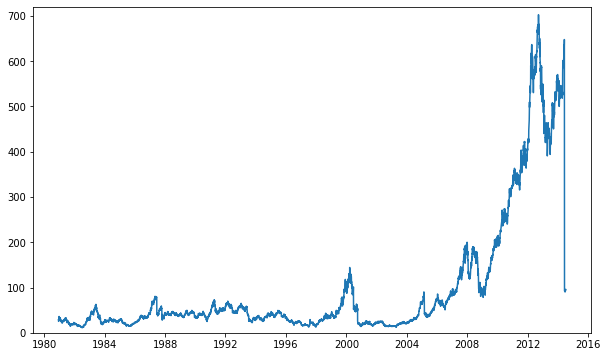

In [212]:
y = apple_month['Close']
x = apple_month.index
fig, ax = plt.subplots(figsize=(10,6))
ax.set_ylim(0,720)
plt.plot(x,y)
plt.show()

Подсчитайте объем торгов за июнь 2014 года

In [200]:
apple_month['Volume'].loc['2014-06':'2014-06'].sum()

1206556300